In [1]:
# Ressources du Blob :

# Variable matrice :
lignes = 10
colonnes = 10
ln = 0 ; cn = 1 #coord nourriture de base 
lb = 9 ; cb = 9 # coord blob de base 

In [2]:
from itertools import product
def neighbors(coord: tuple, grid=(10, 10), diagonal=True):
    """retrouve les coordonnées de tous les voisins de coordonnées dans une grille de taille fixe en deux dimensions).

    :param diagonal: True if you also want the diagonal neighbors, False if not
    :param coord: Tuple with x, y coordinate
    :param grid: the boundary of the grid in layman's terms
    :return: the adjacent coordinates
    """
    width = grid[0] - 1
    height = grid[1] - 1
    retx, rety = coord
    adjacent = []
    nb = [x for x in product([-1, 0, 1], repeat=2) if x != (0, 0)]
    if not diagonal:
        nb = [x for x in nb if x not in product([-1, 1], repeat=2)]
    for x, y in nb:
        xx = retx + x
        yy = rety + y
        if xx < 0 or xx > width or yy < 0 or yy > height:
            # not within its boundaries
            continue
        adjacent.append((xx, yy))
    return adjacent
neighbors((9,9))

[(8, 8), (8, 9), (9, 8)]

True
[[0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


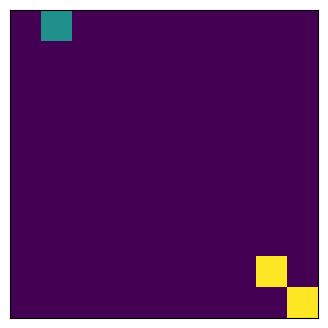

In [3]:
# "Légende" : 1 pour les murs, 2 pour la nourriture, 4 pour le blob et les endroits où celui-ci est passé, 0 pour les cases vides

import numpy as np
import math as m 
from matplotlib import pyplot as plt

def matrice(l, c):
    """ crée la matrice de taille l x c, remplie de 0
    """
    return np.zeros((l, c))

def placement_nourriture(mat,l, c):
    """ place la nourriture dans la matrice à l'emplacement d'indice [l, c]
    """
    mat[l, c] = 2

def deplacement_blob(mat,l, c):
    """ place le blob dans la matrice à l'emplacement d'indice [l, c]
    """
    
    mat[l, c] = 4


def plot_world(world):
    if type(world) == list:
        A = np.array([world])
    else:
        A = world
    plt.figure(figsize=(5,4)) # (30,30) = Taille de la figure
    plt.imshow(A,cmap='viridis')
    plt.tick_params(top=False, bottom=False, right=False, left=False, labelleft=False, labelbottom=False)
    plt.show()

def norme_n (x,y):
    n = m.sqrt( (ln-x)**2 + (cn-y)**2 ) 
    return n

def distance_T(A,B):
    """renvoie la distance de Tchebychev entre A et B"""
    dist = max( m.fabs(A[0] - B[0]),m.fabs(A[1] - B[1])  )
    return dist
A = (0, 6)
B = (0,0)
print(distance_T(A,B) == 6.0)
    
def déplacement(mat, x, y):
    coord = (x, y)
    voisins = neighbors(coord) # liste des voisins de de l'élément de coordonnées x et y 
    voisin_min = voisins[0] # voisin le plus proche de la nourriture de base = premier élément de la liste de voisins
    norme_min = 500000

    for i in range(0, len(voisins)): # on parcourt la liste des voisins de l'élément de coordonnées x et y
        
        n = norme_n(voisins[i][0], voisins[i][1]) # calcul de la longueur du vecteur (voisins[i], nourriture)
        n_valeur = mat[voisins[i][0], voisins[i][1]] # on prend la valeur de ce voisin là (pour savoir si jamais c'est un mur ou un endroit où le blob serait déjà passé)
        
        if n < norme_min and n_valeur == 0: # si la longueur du vecteur calculé au-dessus est + petite que la norme norme_min
            
            norme_min = n # on remplace cette norme minimale par la norme qu'on vient de calculer (étant donnée que le vosin est donc plus proche)
            voisin_min = voisins[i] # et on stocke dans une variable voisin_min les coordonnées de ce voisin
    
    mat[voisin_min[0], voisin_min[1]]= 4 #on utilise les coordonnées du tuple voisin_min pour replacer le blob à cette endroit

                
    
    

    



mat1 = matrice(lignes, colonnes)

deplacement_blob(mat1, lb,cb)

déplacement(mat1, 9,9)

placement_nourriture(mat1, ln,cn)

print(mat1)


plot_world(mat1)  
